# 1. laboratorijska vježba - Spektar signala
---
Cilj ove laboratorijske vježbe je upoznavanje s karakteristikama EMI prijamnika i mjerenje frekvencijskog spektra signala.

## Frekvencijski spektar - Trapezni signal
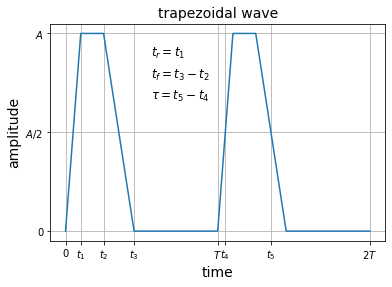

Komponente spektra uz $t_r=t_f$ računaju se prema sljedećim formulama (Paul 2006):

\begin{equation*}
c[0] = \frac{A\tau}{T}
\end{equation*}


\begin{equation*}
c[n] = \frac{2A\tau}{T}\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right | \left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |,
\end{equation*}
gdje c[0] predstavlja amplitudu DC komponente, c[1] amplitudu osnovne frekvencije, a npr. c[4] predstavlja amplitudu 4. harmonika frekvencijskog spektra. Ovojnica spektra trapeznog signala računa se prema formuli
\begin{equation*}
20\log(envelope)=20\log(\frac{2A\tau}{T}) + 20\log(\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right |) + 20\log(\left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |)
\end{equation*}
Ovojnica spektra trokutnog signala ima dvije kaakteristične frekvencije. Nakon prve karakteristične frekvencije $1/\pi \tau$), spektar opada s -20 dB/dek, a nakon druge karakteristične frekvencije $1/\pi t_r$ spektar opada s -40 dB/dek. 

In [18]:
def trap_spectra(A,T,tau,tr,unit):
    # calculation of 100 spectra components
    noC = 100
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = A*(tau/T)
        else:
            sinx_x1 = np.sin((n)*np.pi*tau/T)/((n)*np.pi*tau/T)
            sinx_x2 = np.sin((n)*np.pi*tr/T)/((n)*np.pi*tr/T)
            c[n] = 2*A*(tau/T)*np.abs(sinx_x1)*np.abs(sinx_x2)
                    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f

def envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tau)
    temp1 = np.linspace(fmin, 1/(np.pi*tau), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 2*A*tau/T) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tau) to 1/(pi*tr)
    temp1 = np.linspace(1/(np.pi*tau), 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*20)
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))

    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
          
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)

## Frekvencijski spektar - Trokutni signal
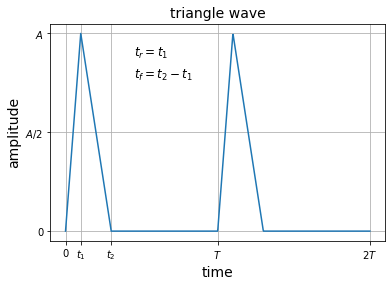
Spektar trokutnog signala dobije se kao poseban slučaj trapeznog, tj. kada je $\tau=t_r=t_f$. U izračunu se podešava samo vrijeme porasta $t_r$ (ne podešava se $\tau$). Ovojnica spektra trapeznog signala ima samo jednu karakterističnu frekvenciju $1/\pi t_r$) nakon koje spektar opada s -40 dB/dek. 

In [19]:
def isotriangle_spectra(A,T,tr,unit):
    # calculation of 100 spectra components
    noC = 100
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = 0.5*A
        else:
            nom1 = np.sin((n)*np.pi*tr/T)
            den1 = (n)*np.pi*tr/T
            c[n] = 2*A*(tr/T)*np.abs(nom1/den1)**2                 
                    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f
    
def envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tr)
    temp1 = np.linspace(fmin, 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        nom1 = np.sin(np.pi*tr/T)
        den1 = np.pi*tr/T
        c = 2*A*(tr/T)*np.abs(nom1/den1)**2        
        temp2 = np.append(temp2, c) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
          
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)   
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx) 


## Frekvencijski spektar - Sinusni signal
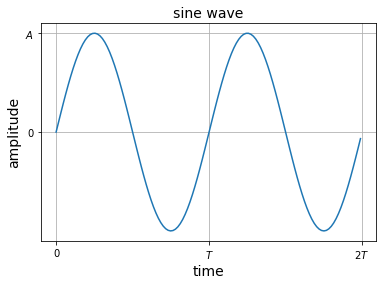
Spektar sinusnog signala sadrži samo komponentu osnovnog harmonika c[1]=$A$. Srednja vrijednost sinusnog signala prikazanog slikom jednaka je 0, pa je time c[0]=0.

In [20]:
def sine_spectra(A,T,unit):
    # calculation of spectra components
    c=[0 for i in range(2)]
    f=[0 for i in range(2)]
    f[0] = 0
    c[0] = 0     
    f[1] = 1/T
    c[1] = A     
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        c[1] = 20*np.log10(c[1]/1e-3)      
        return c,f
    elif (unit == '[dBuV]'):
        c[1] = 20*np.log10(c[1]/1e-6)    
        return c,f

## EMI prijamnik

U ovoj vježbi će se EMI prijamnik koristiti u _Spectrum Mode_ radi veće fleksibilnosti podešenja parametara.<br>
<code> <b>MODE</b>->Spectrum</code>

---
### Detektori
<code> <b>TRACE</b>->Trace 1->Detector Man-></code> <br>
#### Average Detector
The average detector yields the average level of the samples of the samples measured during the set measurement time. The video voltage samples (envelope IF signal) are averaged.
Regarding measurement time
- with unmodulated signals the shortest possible measurement time can be selected.
- with modulated signals the measurement time is determined by the lowest modulation frequency to be averaged.
- with pulse signals, the selected measurement time should be long enough for suffi-cient number of pulses (>10) to occur in the measurement window for averaging

#### RMS Detector
The RMS detector evaluates the root mean square (RMS) value over the specified measurement time and displays the resulting value. VBW is bypassed.
Regarding measurement time
- with unmodulated signals the shortest possible measurement time can be selected.
- with modulated signals the measurement time is determined by the lowest modulation frequency to be averaged.
- with pulse signals, the selected measurement time should be long enough for suffi-cient number of pulses (>10) to occur in the measurement window for averaging

#### Sample Detector
The sample detector displays the instantaneous value of the level at a pixel. 

#### Quasipeak Detector
The quasipeak detector yields the maximum detected value weighted to CISPR16-1-1 that was detected during the measurement time. RBW is automatically selected.
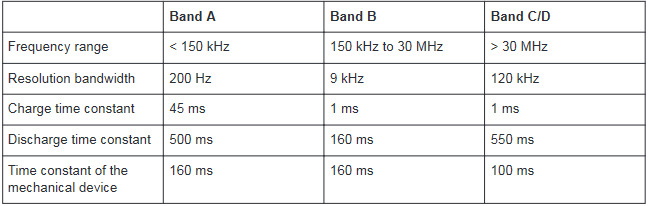

#### CISPR Average Detector
The CISPR Average detector yields a weighted average signal level according to CISPR 16-1-1.

---
### Način prikaza (engl. _Trace Mode_)
<code> <b>TRACE</b>->Trace 1-></code> <br>
#### Clear Write
Overwrite mode: the trace is overwritten by each sweep. This is the default setting.
#### Max Hold
The maximum value is determined over several sweeps and displayed. This mode is especially useful with modulated or pulsed signals. 
#### Min Hold
The minimum value is determined from several measurements and displayed. This mode is useful e.g. for making an unmodulated carrier in a composite signal visible. Noise, interference signals or modulated signals are suppressed whereas a CW signal is recognized by its constant level.
#### View
The current contents of the trace memory are frozen and displayed.
#### Blank
Hides the selected trace.

## Zadatak
1. Na generatoru signala podesiti trapezni valni oblik signala s sljedećim parametrima:
>- $f = 50\; \rm{MHz}$
>- $\tau = 10\; \rm{ns}$
>- $t_r=t_f= 2,9\; \rm{ns}$
>- $A = 1\; \rm{V}$ (offset = 500 mV)

In [21]:
f = 50e6
T = 1/f
tau = T/2
tr = 2.9e-9
A = 1

2. Podesiti sljedeće parametre EMI prijamnika
><code> <b>MODE</b>->Spectrum</code> <br> 
><code> <b>FREQ</b>->Start->30 MHz</code> <br>
><code> <b>FREQ</b>->Stop->1 GHz</code> <br>
><code> <b>SPAN</b>->Freq Axis->Log</code> <br>
><code> <b>AMPT</b>->Unit->dBuV</code> <br>
><code> <b>AMPT</b>->Ref Level->120 dBuV</code> <br>
><code> <b>AMPT</b>->RF Atten Auto</code> <br>
><code> <b>BW</b>->Res BW Manual->9 kHz</code> <br>
><code> <b>BW</b>->Video BW Manual->100 kHz</code> <br>
><code> <b>SWEEP</b>->Sweep Points->8001</code> <br>
><code> <b>TRACE</b>->Trace 1->Average</code> <br>
><code> <b>TRACE</b>->Trace 1->Detector Man->Auto Peak</code> <br>
><code> <b>INPUT/OUTPUT</b>->Input AC</code> <br>
><code> <b>RUN CONT</b></code> <br>

In [22]:
unit = '[dBuV]'
ymin = 0
ymax = 120
fmin = 30e6
fmax = 1e9

3. Spojiti generator signala na EMI prijamnik
4. Snimiti dobiveni spektar
><code> <b>SAVE/RCL</b>->Export->ASCII Trace Export Trace (1)->"spektar1.DAT"</code> <br> 

In [23]:
filename1 = 'spektar1.DAT'

5. Usporediti dobiveni spektar s teorijskim izračunom

<IPython.core.display.Javascript object>


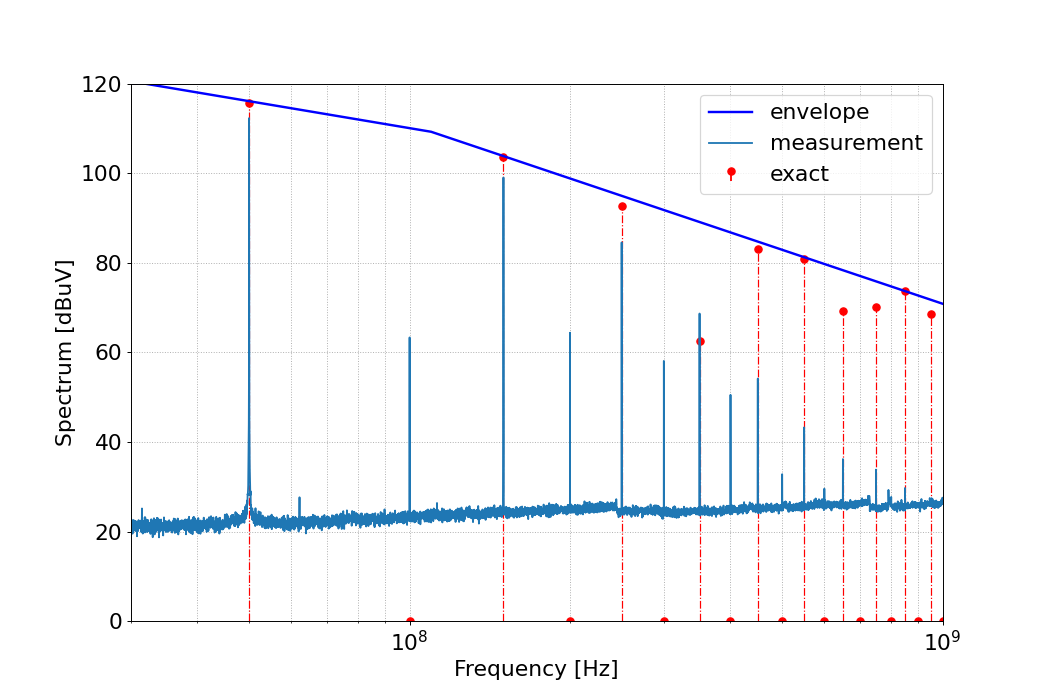

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca()                       
axes.set_xscale("log")
axes.set_yscale("linear") 
plt.grid(True,which="both",ls=":")
plt.xlabel('Frequency [Hz]')    

plt.ylabel('Spectrum '+unit)
plt.ylim(bottom = ymin, top = ymax)  
plt.xlim(left = fmin, right = fmax)

# analitički izračun
c,f1 = trap_spectra(A,T,tau,tr,unit)          
envelope,f2 = envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax)        
markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='exact',use_line_collection=True)
axes.plot(f2, envelope, lw=2, color='blue',label='envelope')     
            
plt.setp(baseline, color='r', linewidth=0)
plt.setp(stemlines, color='r', linewidth=1)
plt.setp(markerline, color='r', linewidth=2) 

# mjerenje
data = pd.read_csv(filename1, delimiter=';',skiprows=29,usecols = (0,1))
data.columns = ['freq', 'dB']
data = data.dropna()
x1 = data['freq'].drop([0]).astype('float')
y1 = data['dB'].drop([0]).astype('float')
axes.plot(x1,y1, linestyle='-',label='measurement') 

leg = axes.legend()

6. Povećati vrijeme porasta signala generatora na 10 ns. Prikazati usporedbu analitičkog proračuna i mjerenja. U čemu se razlikuje dobiveni spektar?
7. Povećati RBW na 100 kHz. Prikazati usporedbu analitičkog proračuna i mjerenja. U čemu se razlikuje dobiveni spektar?
